In [154]:
# Imported all the needed libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [119]:
df=pd.read_csv("Health_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [120]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


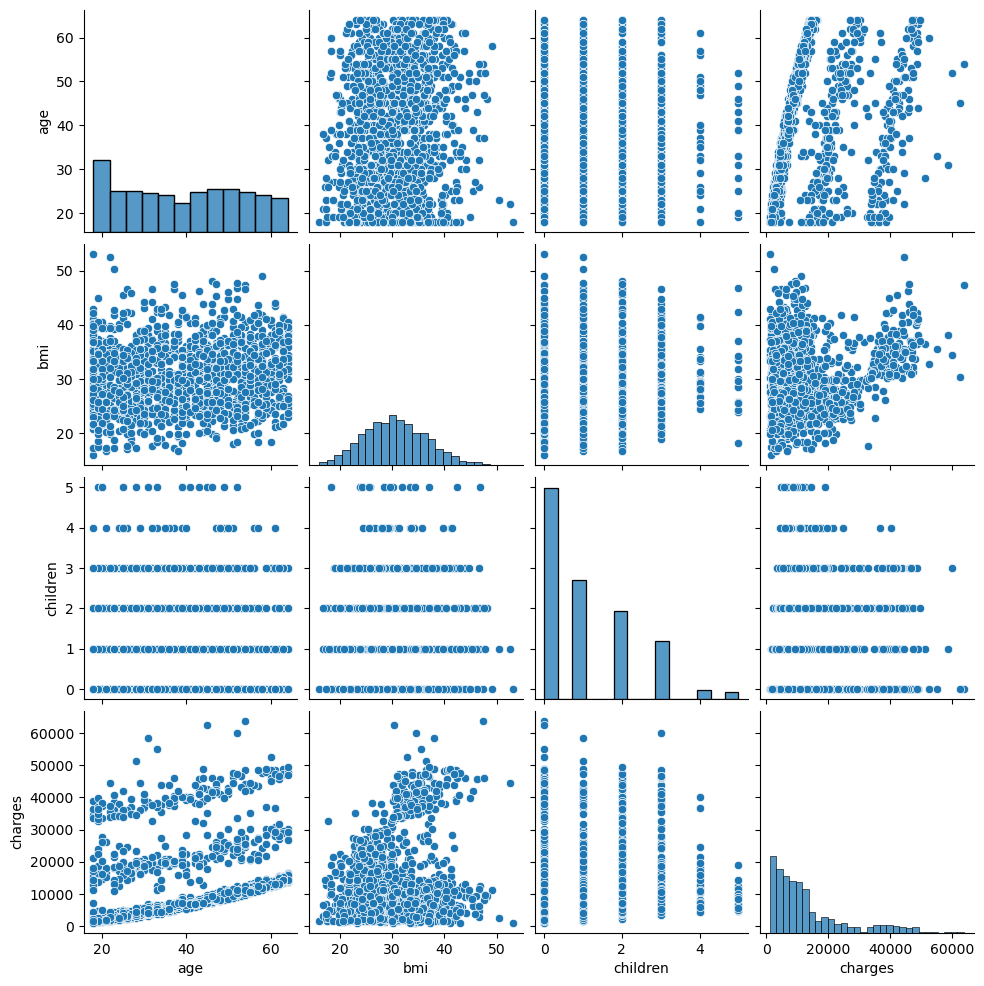

In [123]:
sns.pairplot(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13708\1841506677.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Feature correlation matrix.')

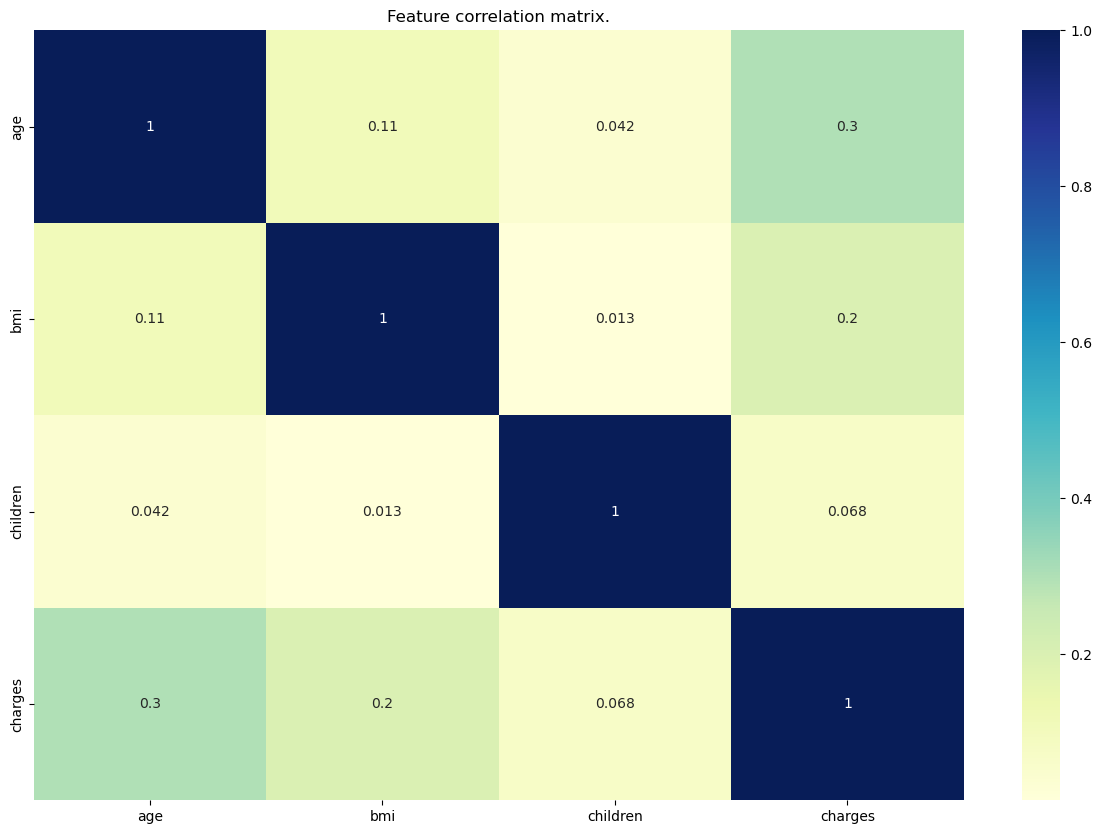

In [124]:

# The correlation matrix helps us map input features of the data.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Feature correlation matrix.")




In [125]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


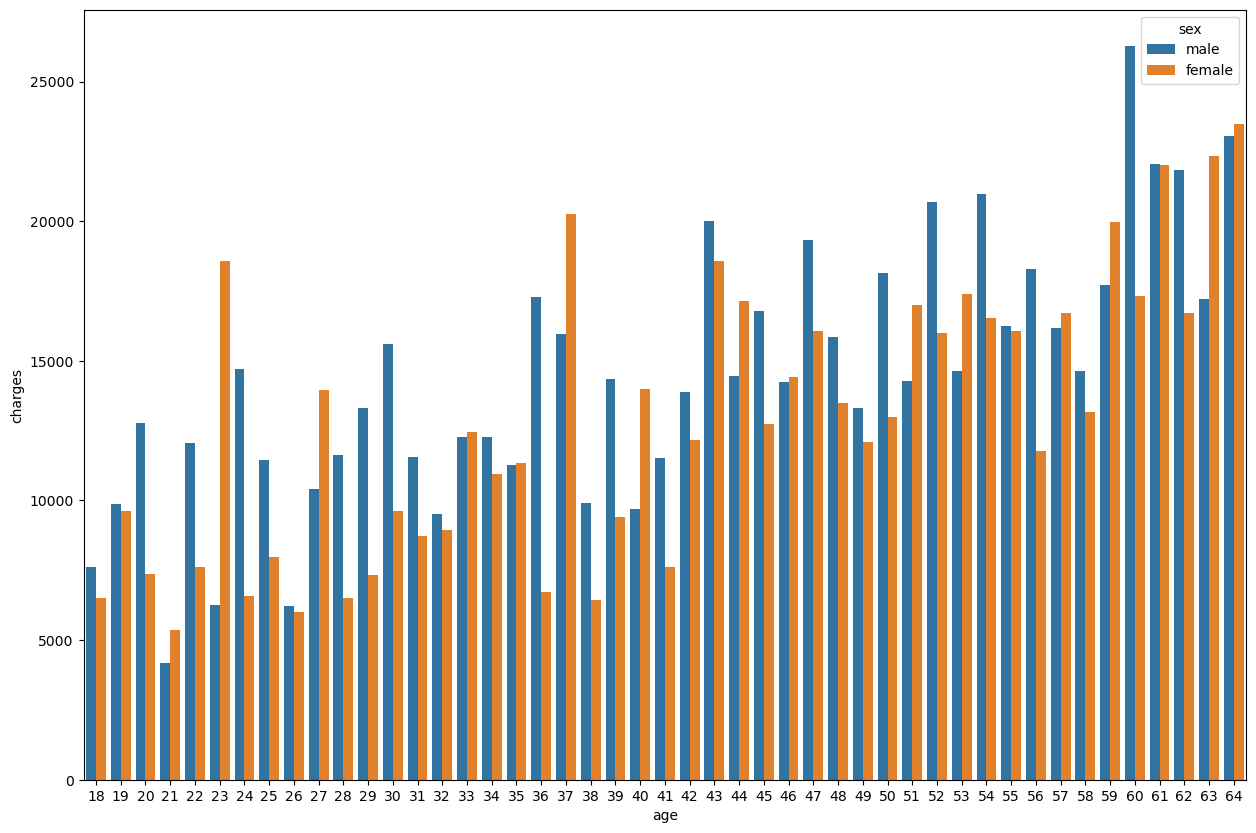

In [126]:
age=df.groupby(["age","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="age",y="charges",data=age,hue="sex")
plt.show()

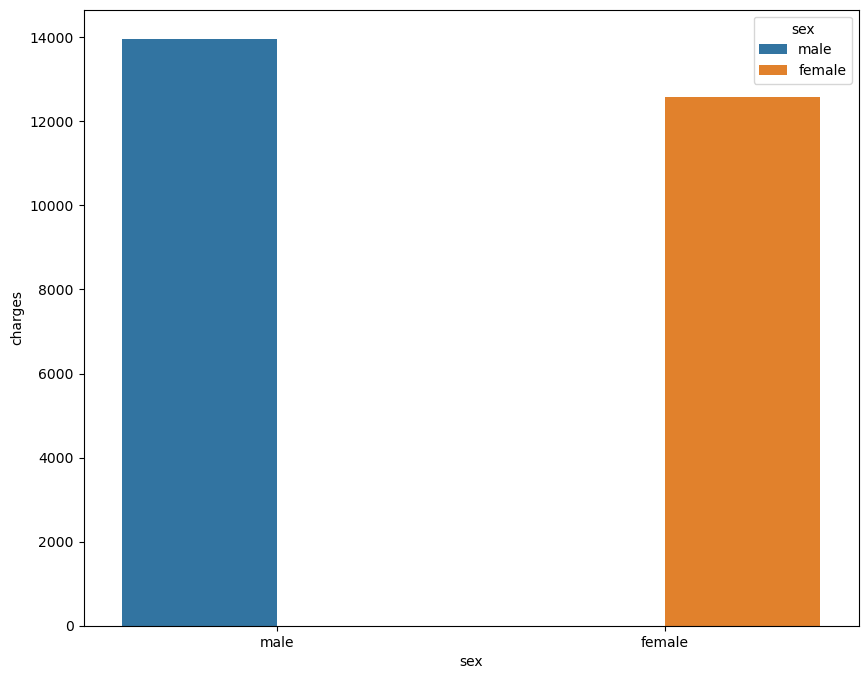

In [127]:
sex=df.groupby("sex")["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="sex",y="charges",data=sex,hue="sex")
plt.show()

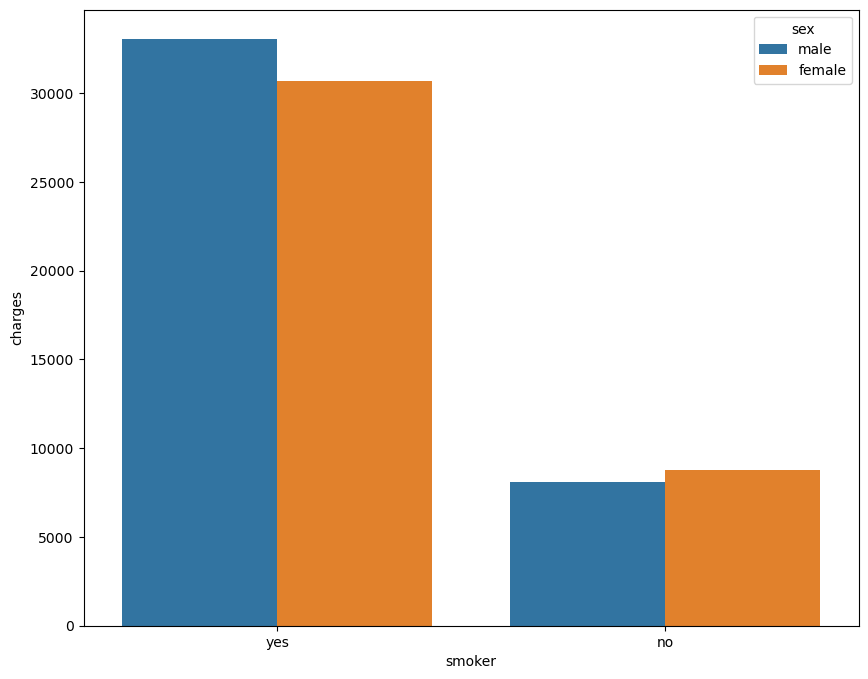

In [128]:
smoker=df.groupby(["smoker","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="smoker",y="charges",data=smoker,hue="sex")
plt.show()

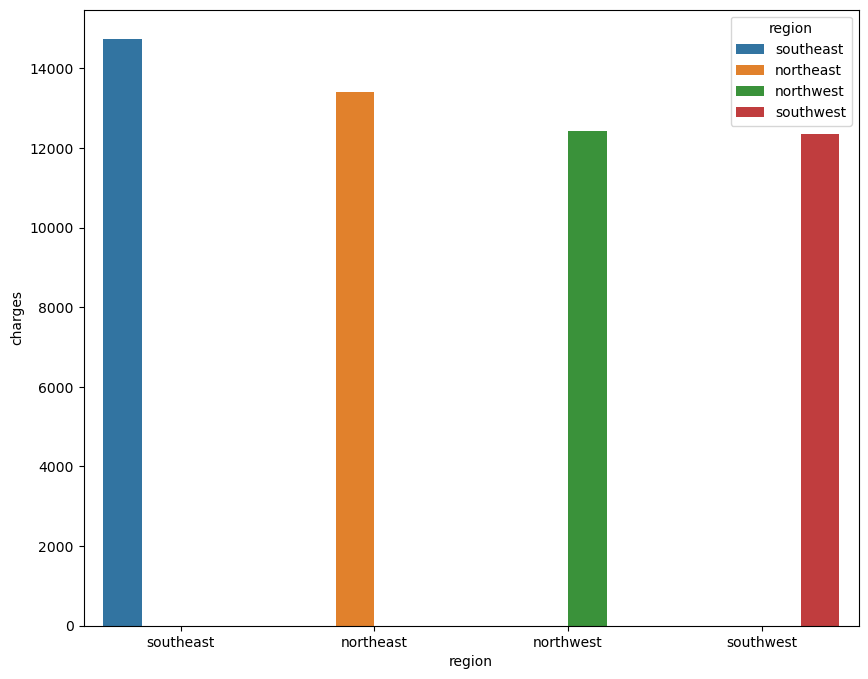

In [129]:
region=df.groupby("region")["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="region",y="charges",data=region,hue="region")
plt.show()

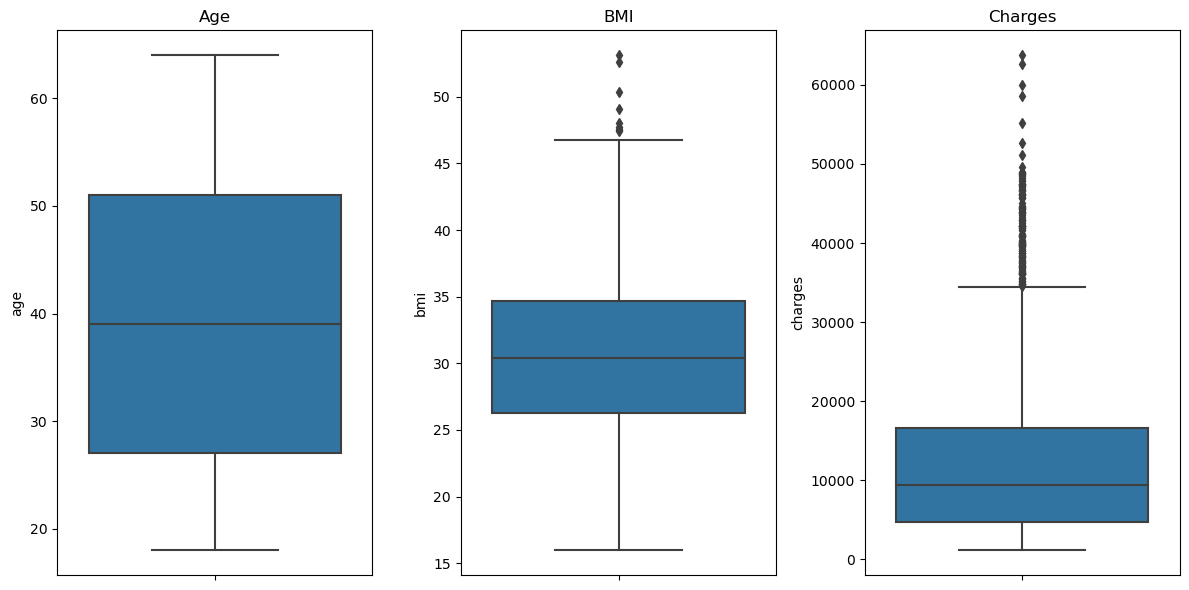

In [130]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["age"])
plt.title("Age")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["bmi"])
plt.title("BMI")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["charges"])
plt.title('Charges')

plt.tight_layout()
plt.show()

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


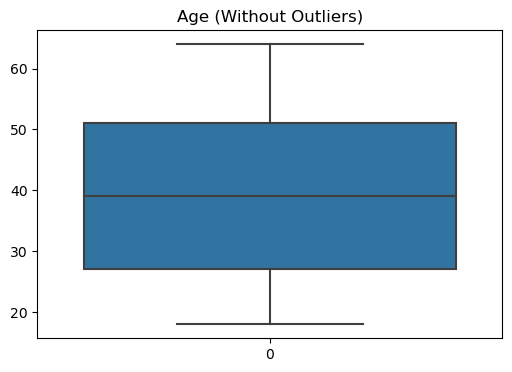

In [131]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers=df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
print(outliers)

df=df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]


plt.figure(figsize=(6, 4))
sns.boxplot(df["age"])
plt.title("Age (Without Outliers)")
plt.show()


      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


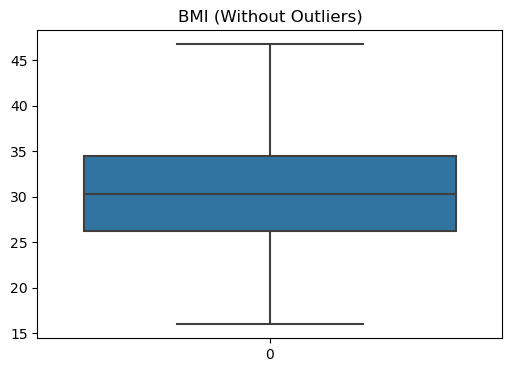

In [132]:
Q1=df["bmi"].quantile(0.25)
Q3=df["bmi"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df["bmi"]<lower_bound) | (df["bmi"]>upper_bound)]

print(outliers)

df=df[(df["bmi"]>=lower_bound) & (df["bmi"]<=upper_bound)]

plt.figure(figsize=(6, 4))
sns.boxplot(df["bmi"])
plt.title("BMI (Without Outliers)")
plt.show()

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[138 rows x 7 columns]


Text(0.5, 1.0, 'Charges (Without Outliers)')

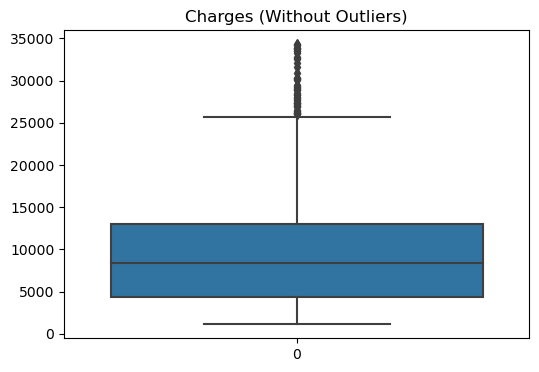

In [133]:
Q1=df["charges"].quantile(0.25)
Q3=df["charges"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df["charges"]<lower_bound) | (df["charges"]>upper_bound)]

print(outliers)

df=df[(df["charges"]>=lower_bound) & (df["charges"]<=upper_bound)]

plt.figure(figsize=(6, 4))
sns.boxplot(df["charges"])
plt.title("Charges (Without Outliers)")

In [134]:
df.shape

(1191, 7)

In [135]:
#Encoding categorical variables to continious variable.
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"no":0,"yes":1})
df["region"]=df["region"].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

In [136]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [138]:
df.drop(["region"],axis=1,inplace=True)

In [139]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

In [146]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

selector=SelectKBest(score_func=f_regression,k=5)
x_selected=selector.fit_transform(x_scaled,y)

np.set_printoptions(precision=3)
print(selector.scores_)

selected_mask = selector.get_support()

selected_feature_names= x.columns[selected_mask]

print(selected_feature_names)

x_selected=x[selected_feature_names]
print(x_selected)

[2.999e+02 6.235e-01 4.965e+00 9.511e+00 6.558e+02]
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')
      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1191 rows x 5 columns]


In [147]:
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=42)

In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(952, 5)
(239, 5)
(952,)
(239,)


In [149]:
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

MAE: 2683.876379352056
MSE: 20435394.46339028
RMSE: 4520.552451126995


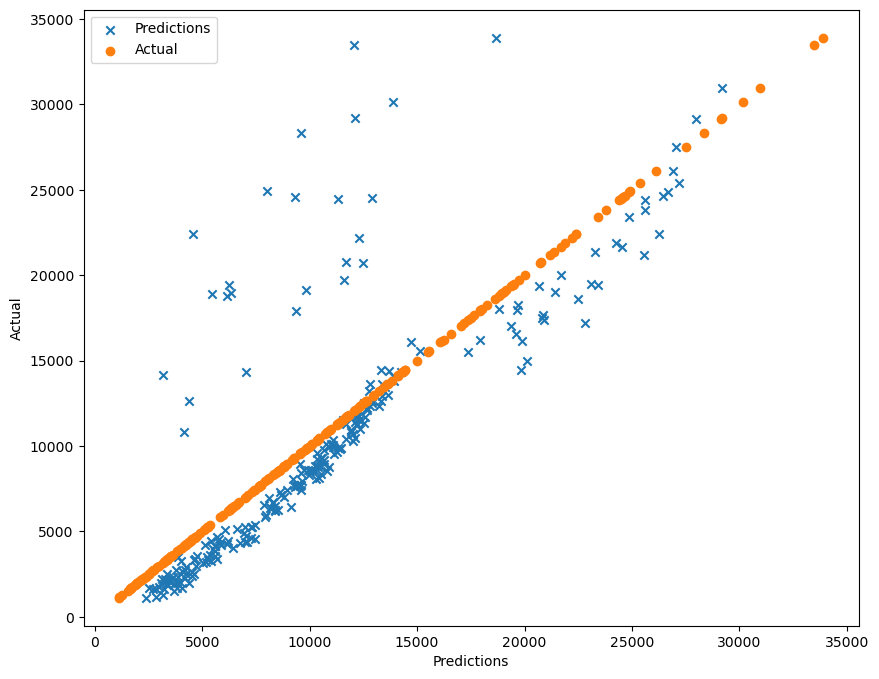

In [151]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,marker="x",label="Predictions")
plt.scatter(y_test,y_test,marker="o",label="Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.show()

MAE: 2790.1413709351464
MSE: 25515146.35783438
RMSE: 5051.251959448705


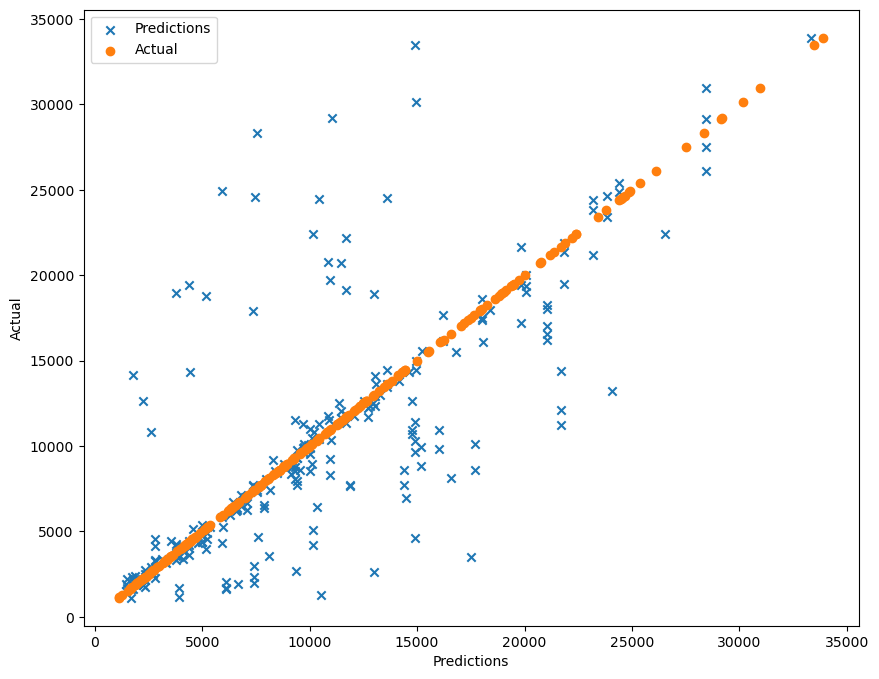

In [152]:
dtree=DecisionTreeRegressor(max_depth=None,min_samples_split=2,min_samples_leaf=3,random_state=42)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,marker="x",label="Predictions")
plt.scatter(y_test,y_test,marker="o",label="Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.show()

MAE: 2374.621378172652
MSE: 19226311.14619907
RMSE: 4384.781767226172


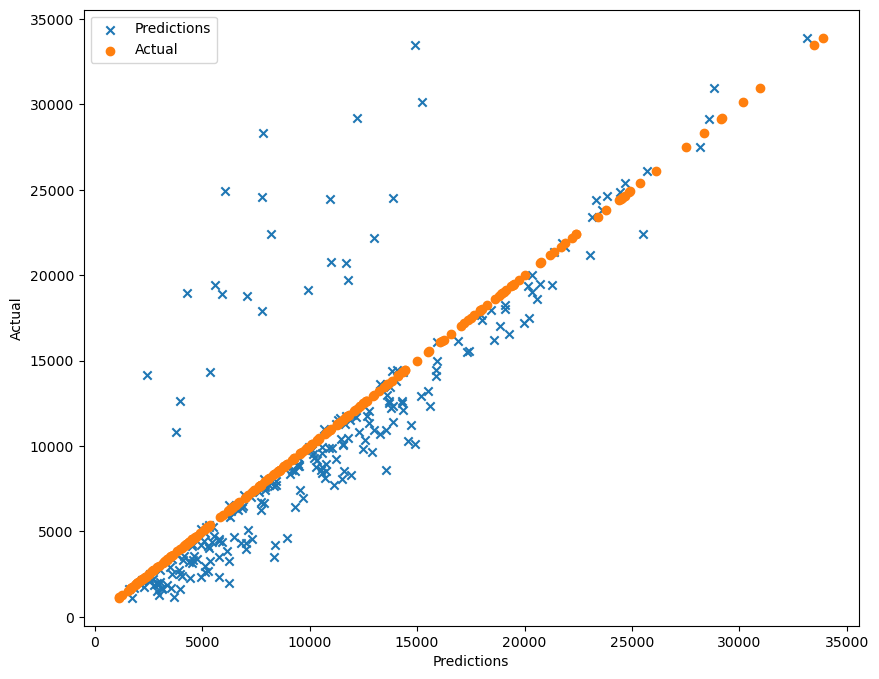

In [153]:
rforest=RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_split=2,min_samples_leaf=4,random_state=42)
rforest.fit(x_train,y_train)
y_pred=rforest.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,marker="x",label="Predictions")
plt.scatter(y_test,y_test,marker="o",label="Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.show()

MAE: 2381.988799489034
MSE: 18730877.793988124
RMSE: 4327.9184135087535


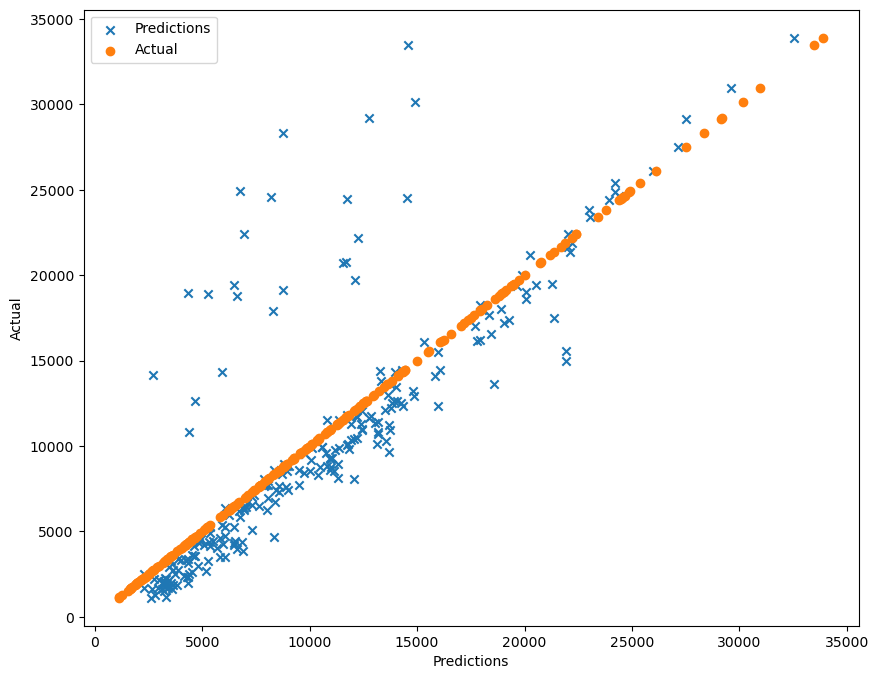

In [155]:
seed=23
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=seed)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,marker="x",label="Predictions")
plt.scatter(y_test,y_test,marker="o",label="Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.show()

In [156]:
param_dist={
    "n_estimators":[100,200,300],
     "learning_rate":[0.01,0.1,0.2],
     "max_depth":[3,4,5]
}

estimator=GradientBoostingRegressor(random_state=seed)

grid=GridSearchCV(estimator=estimator,param_grid=param_dist,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)

grid.fit(x_train,y_train)

best_params=grid.best_params_
best_estimator=grid.best_estimator_
best_score=grid.best_score_

In [157]:
best_params

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [158]:
best_estimator

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=23)

In [159]:
best_model=GradientBoostingRegressor(learning_rate=0.01,n_estimators=300,random_state=seed)
best_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=23)

In [160]:
test_score= best_estimator.score(x_test,y_test)
print("Test Score:",test_score)

Test Score: 0.6552417814632545
